In [4]:
!pip install plotly
import pandas as pd
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt



In [24]:
df = pd.read_csv('/content/District-wise, season-wise crop production statistics from 1997.csv')
df = df.dropna(subset=['Production'])
df['Crop'] = df['Crop'].str.strip().str.title()
df['Season'] = df['Season'].str.strip().str.title()
df['State_Name'] = df['State_Name'].str.strip().str.title()
print(df.head())
print(df.info())

                    State_Name District_Name  Crop_Year      Season  \
0  Andaman And Nicobar Islands      NICOBARS       2000      Kharif   
1  Andaman And Nicobar Islands      NICOBARS       2000      Kharif   
2  Andaman And Nicobar Islands      NICOBARS       2000      Kharif   
3  Andaman And Nicobar Islands      NICOBARS       2000  Whole Year   
4  Andaman And Nicobar Islands      NICOBARS       2000  Whole Year   

                  Crop    Area  Production  
0             Arecanut  1254.0      2000.0  
1  Other Kharif Pulses     2.0         1.0  
2                 Rice   102.0       321.0  
3               Banana   176.0       641.0  
4            Cashewnut   720.0       165.0  
<class 'pandas.core.frame.DataFrame'>
Index: 242361 entries, 0 to 246090
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   State_Name     242361 non-null  object 
 1   District_Name  242361 non-null  object 
 2   Crop_Year    

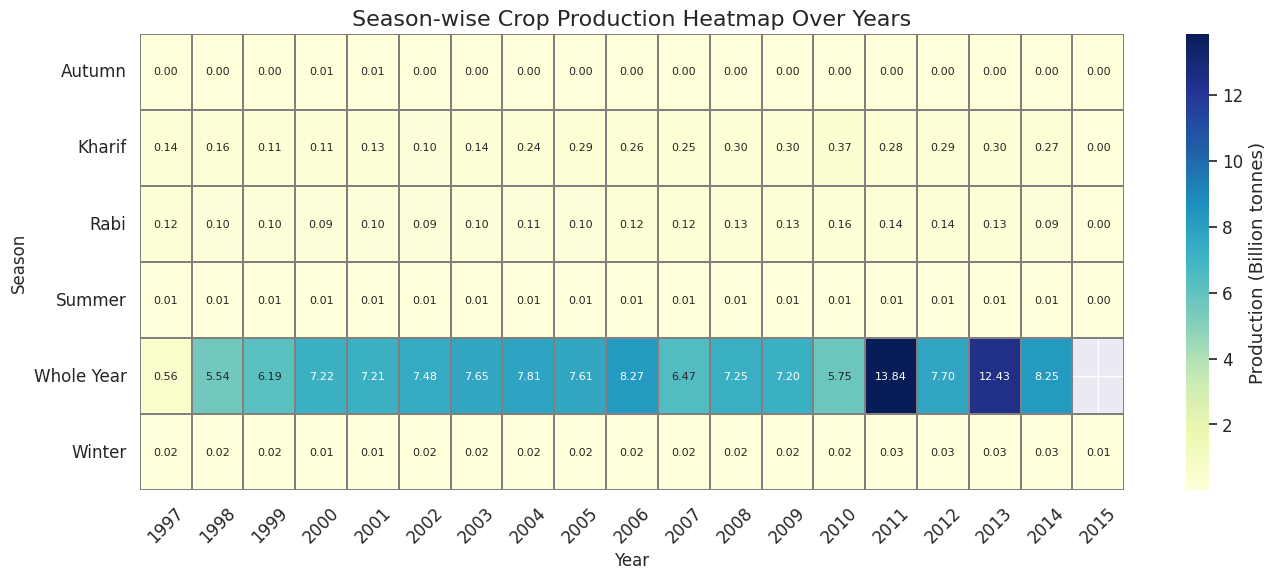

In [20]:
#heatmap
# 🧹 Clean and prepare data
heatmap_df = df.groupby(['Crop_Year', 'Season'])['Production'].sum().reset_index()
heatmap_pivot = heatmap_df.pivot(index='Season', columns='Crop_Year', values='Production')


heatmap_pivot = heatmap_pivot / 1e9  # Convert to billions

# 🎨 Heatmap
plt.figure(figsize=(14, 6))
sns.set(font_scale=1.1)
ax = sns.heatmap(heatmap_pivot, cmap="YlGnBu", annot=True, fmt=".2f", linewidths=0.3, linecolor='gray',
                 annot_kws={"size": 8}, cbar_kws={'label': 'Production (Billion tonnes)'})
plt.title("Season-wise Crop Production Heatmap Over Years", fontsize=16)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Season", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [38]:
import plotly.express as px


fig_dropdown = go.Figure()

buttons = []
for season in seasons:
    df_season = seasonal_production[seasonal_production['Season'] == season]
    fig_dropdown.add_trace(go.Scatter(
        x=df_season['Crop_Year'],
        y=df_season['Production'],
        name=season,
        visible=(season == seasons[0])
    ))
    buttons.append(dict(label=season,
                        method='update',
                        args=[{'visible': [s == season for s in seasons]},
                              {'title': f"Production for {season} season"}]))

fig_dropdown.update_layout(
    updatemenus=[dict(active=0, buttons=buttons)],
    title=f"Total Production for {seasons[0]} season",
    xaxis_title="Year",
    yaxis_title="Production",
    height=500
)

fig_dropdown.show()


In [31]:
seasonal_production = df.groupby(['Crop_Year', 'Season'])['Production'].sum().reset_index()

fig = go.Figure()
seasons = seasonal_production['Season'].unique()

for season in seasons:
    df_season = seasonal_production[seasonal_production['Season'] == season]
    fig.add_trace(go.Scatter(
        x=df_season['Crop_Year'],
        y=df_season['Production'],
        mode='lines+markers',
        name=season,
        visible=(season == seasons[0])  # show only first season initially
    ))

buttons = []
for season in seasons:
    visibility = [s == season for s in seasons]
    buttons.append(dict(
        label=season,
        method='update',
        args=[{'visible': visibility},
              {'title': f'Season-wise Crop Production: {season}'}]
    ))

fig.update_layout(
    updatemenus=[dict(active=0, buttons=buttons)],
    title=f'Season-wise Crop Production: {seasons[0]}',
    xaxis_title='Year',
    yaxis_title='Production',
    height=500
)

fig.show()


In [32]:
crop_production = df.groupby(['Crop_Year', 'Crop'])['Production'].sum().reset_index()

fig = go.Figure()
crops = crop_production['Crop'].unique()

for crop in crops:
    df_crop = crop_production[crop_production['Crop'] == crop]
    fig.add_trace(go.Scatter(
        x=df_crop['Crop_Year'],
        y=df_crop['Production'],
        mode='lines+markers',
        name=crop,
        visible=(crop == crops[0])
    ))

buttons = []
for crop in crops:
    visibility = [c == crop for c in crops]
    buttons.append(dict(
        label=crop,
        method='update',
        args=[{'visible': visibility},
              {'title': f'Crop-wise Production: {crop}'}]
    ))

fig.update_layout(
    updatemenus=[dict(active=0, buttons=buttons)],
    title=f'Crop-wise Production: {crops[0]}',
    xaxis_title='Year',
    yaxis_title='Production',
    height=500
)

fig.show()


In [33]:
district_production = df.groupby(['Crop_Year', 'District_Name'])['Production'].sum().reset_index()

fig = go.Figure()
districts = district_production['District_Name'].unique()

for dist in districts:
    df_dist = district_production[district_production['District_Name'] == dist]
    fig.add_trace(go.Scatter(
        x=df_dist['Crop_Year'],
        y=df_dist['Production'],
        mode='lines+markers',
        name=dist,
        visible=(dist == districts[0])
    ))

buttons = []
for dist in districts:
    visibility = [d == dist for d in districts]
    buttons.append(dict(
        label=dist,
        method='update',
        args=[{'visible': visibility},
              {'title': f'District-wise Production: {dist}'}]
    ))

fig.update_layout(
    updatemenus=[dict(active=0, buttons=buttons)],
    title=f'District-wise Production: {districts[0]}',
    xaxis_title='Year',
    yaxis_title='Production',
    height=500
)

fig.show()


In [37]:
import plotly.graph_objects as go

state_production = df.groupby(['Crop_Year', 'State_Name'])['Production'].sum().reset_index()

fig = go.Figure()
states = state_production['State_Name'].unique()

# Add traces for each state
for state in states:
    df_state = state_production[state_production['State_Name'] == state]
    fig.add_trace(go.Scatter(
        x=df_state['Crop_Year'],
        y=df_state['Production'],
        mode='lines+markers',
        name=state,
        visible=(state == states[0])  # Only first state visible initially
    ))

# Create buttons for update menu
buttons = []
for state in states:
    visibility = [s == state for s in states]
    buttons.append(dict(
        label=state,
        method='update',
        args=[{'visible': visibility},
              {'title': f'State-wise Production: {state}'}]
    ))

fig.update_layout(
    updatemenus=[dict(
        active=0,
        buttons=buttons,
        x=1.1,  # position right of the plot
        y=1
    )],
    title=f'State-wise Production: {states[0]}',
    xaxis_title='Year',
    yaxis_title='Production',
    height=500
)

fig.show()


In [40]:
!pip install dash


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 51.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.7/101.7 kB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 228.0/228.0 kB 16.6 MB/s eta 0:00:00
  Attempting uninstall: Werkzeug
    Found existing installation: Werkzeug 3.1.3
    Uninstalling Werkzeug-3.1.3:
      Successfully uninstalled Werkzeug-3.1.3
  Attempting uninstall: Flask
    Found existing installation: Flask 3.1.1
    Uninstalling Flask-3.1.1:
      Successfully uninstalled Flask-3.1.1


In [44]:
import dash
from dash import dcc, html, Input, Output
import pandas as pd
import plotly.express as px

# App instance
app = dash.Dash(__name__)

# Load data
df = pd.read_csv("District-wise, season-wise crop production statistics from 1997.csv")
df.dropna(subset=["Production"], inplace=True)
df["Crop"] = df["Crop"].str.strip().str.title()
df["Season"] = df["Season"].str.strip().str.title()
df["State_Name"] = df["State_Name"].str.strip().str.title()

# App layout
app.layout = html.Div([
    html.H1("Crop Production Dashboard"),

    html.Label("Select State"),
    dcc.Dropdown(df["State_Name"].unique(), "Kerala", id="state-dropdown"),

    html.Label("Select Crop"),
    dcc.Dropdown(df["Crop"].unique(), "Rice", id="crop-dropdown"),

    dcc.Graph(id="production-graph")
])

# Callback
@app.callback(
    Output("production-graph", "figure"),
    Input("state-dropdown", "value"),
    Input("crop-dropdown", "value")
)
def update_graph(state, crop):
    filtered = df[(df["State_Name"] == state) & (df["Crop"] == crop)]
    fig = px.bar(filtered, x="Crop_Year", y="Production", color="Season", title=f"{crop} Production in {state}")
    return fig

if __name__ == "__main__":
    app.run(debug=True)



<IPython.core.display.Javascript object>